In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sys,time
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip NEW_Table_2C_rxnorn_id_drug_no_effect_offside.zip

Archive:  NEW_Table_2C_rxnorn_id_drug_no_effect_offside.zip
  inflating: NEW_Table_2C_rxnorn_id_drug_no_effect_offside.csv  


In [26]:
df = pd.read_csv('/content/NEW_Table_2C_rxnorn_id_drug_no_effect_offside.csv',)

In [27]:
df.drop_duplicates().to_csv('test.tsv', index = False, sep='\t')

In [28]:
df = pd.read_csv('test.tsv', sep='\t')

In [29]:
df

,drug_rxnorn_id,drug_concept_name,SideEffectsOffSide,NoOfSideEffects
0,4024,"ergoloid mesylates, USP","['Anaemia', 'Aplasia pure red cell', 'Dissemin...",284
1,7514,Norethindrone,"['Iron deficiency anaemia', 'Anaemia', 'Normoc...",1793
2,214354,candesartan,"['Anaemia vitamin B12 deficiency', 'Iron defic...",5246
3,1897,Calcium Carbonate,"['Anaemia vitamin B12 deficiency', 'Iron defic...",5884
4,262100,rapacuronium,"['Cardiac arrest', 'Bronchospasm']",2
...,...,...,...,...
2725,236388,LEVOMENTHOL,"['Ear infection', 'Diabetes mellitus', 'Hyperg...",14
2726,8356,Piroxicam,"['Iron deficiency anaemia', 'Anaemia', 'Anaemi...",2330
2727,117055,alemtuzumab,"['Anaemia', 'Haemorrhagic anaemia', 'Anaemia o...",1978
2728,59768,pegademase bovine,"['Anaemia', 'Disseminated intravascular coagul...",102


In [30]:
df.drop(df.loc[df['drug_concept_name']=='drug_concept_name'].index, inplace=True)

In [40]:
df=df.reset_index()

In [41]:
df.isnull().sum()

index                 0
drug_rxnorn_id        0
drug_concept_name     0
SideEffectsOffSide    0
NoOfSideEffects       0
dtype: int64

In [42]:
def greater(sideeff1,sideeff2):
    if sideeff2<sideeff1:
        total_symp=sideeff1
    elif sideeff2>sideeff1:
        total_symp=sideeff1
    else:
        total_symp=sideeff1
    return total_symp

In [43]:
drugname=df['drug_concept_name']
side_eff=df["SideEffectsOffSide"]
no_side=df["NoOfSideEffects"]
df2=df

In [44]:
length=len(df)

In [45]:
for j in tqdm(range(length)):
    
  list1 = set(side_eff[j].split(","))
  drugocc={}
  sideeff1=no_side[j]

  for i in range(length):
    list2 = set(side_eff[i].split(","))
    sideeff2=no_side[i]
        
    if drugname[i]==drugname[j]:
        value=1
    else:
        value = len(set(list1).intersection(list2))/greater(sideeff1,sideeff2)

    drugocc[drugname[i]]=value
  df2[drugname[j]] = df['drug_concept_name'].map(drugocc)

100%|██████████| 2729/2729 [33:30<00:00,  1.36it/s]


In [46]:
df2[drugname[j]]

0       0.4
1       0.6
2       0.6
3       0.6
4       0.0
       ... 
2724    0.0
2725    0.4
2726    0.6
2727    0.2
2728    1.0
Name: BATILOL, Length: 2729, dtype: float64

In [47]:
df2.isnull().sum()

index                 0
drug_rxnorn_id        0
drug_concept_name     0
SideEffectsOffSide    0
NoOfSideEffects       0
                     ..
LEVOMENTHOL           0
Piroxicam             0
alemtuzumab           0
pegademase bovine     0
BATILOL               0
Length: 2734, dtype: int64

In [50]:
df2

,index,drug_rxnorn_id,drug_concept_name,SideEffectsOffSide,NoOfSideEffects,"ergoloid mesylates, USP",Norethindrone,candesartan,Calcium Carbonate,rapacuronium,orgotein,hypromellose,methyl salicylate,Ergotamine,Aldosterone,Norfloxacin,Hydrochlorothiazide,Norethandrolone,Iproniazid,ropivacaine,Thymol,Dextran 70,Norepinephrine,Menthol,oxaprozin,Ethosuximide,Dothiepin,"camphor, (-)-",Turpentine,tafluprost,riociguat,Clonixin,gabapentin,Prednimustine,Rifampin,Polyvinyl Alcohol,"Insulin, Pork",Vorinostat,deferasirox,Epoetin Alfa,...,Sodium Bicarbonate,nilotinib,Benzbromarone,Simethicone,Phenolphthalein,dolomite,levocetirizine,Mefruside,dabrafenib,xanthine,fondaparinux,Molindone,Streptozocin,aluminum chloride,black currant oil,indacaterol,fluindione,panitumumab,Betamethasone,"tetanus toxoid vaccine, inactivated",vincristine liposome,dexchlorpheniramine,Povidone,carfilzomib,Bufexamac,Phenoxybenzamine,"synthetic conjugated estrogens, B",Cephalexin,glibornuride,Metipranolol,Nicergoline,Hexetidine,zafirlukast,ranolazine,Oxprenolol,LEVOMENTHOL,Piroxicam,alemtuzumab,pegademase bovine,BATILOL
0,0,4024,"ergoloid mesylates, USP","['Anaemia', 'Aplasia pure red cell', 'Dissemin...",284,1.000000,0.133854,0.053565,0.047927,0.0,0.460177,0.222337,0.261218,0.266771,0.503497,0.171139,0.037512,0.636364,0.703704,0.192342,0.356061,0.341207,0.134139,0.187500,0.177881,0.270627,0.225840,0.434783,0.333333,0.328691,0.279762,0.645161,0.037115,0.333333,0.093179,0.318280,0.500000,0.183962,0.081717,0.063214,...,0.094293,0.102999,0.217002,0.140780,0.350120,0.666667,0.120960,0.569231,0.270909,0.000000,0.113555,0.446154,0.400,0.373563,0.7,0.201993,0.101261,0.155369,0.072358,0.438679,0.0,0.133747,0.465278,0.226054,0.529412,0.471545,0.365217,0.067863,0.555556,0.525424,0.257215,0.409091,0.173343,0.163587,0.487179,0.571429,0.113305,0.116279,0.313725,0.4
1,1,7514,Norethindrone,"['Iron deficiency anaemia', 'Anaemia', 'Normoc...",1793,0.845070,1.000000,0.298894,0.281611,0.0,0.823009,0.693899,0.748397,0.789392,0.895105,0.588832,0.230543,0.848485,0.925926,0.571683,0.772727,0.811024,0.479154,0.671667,0.677494,0.726073,0.712185,0.826087,0.666667,0.766017,0.763889,0.903226,0.227691,0.333333,0.405063,0.800000,0.892157,0.596226,0.384420,0.333567,...,0.414747,0.447119,0.618568,0.590460,0.846523,0.833333,0.538319,0.815385,0.765455,0.333333,0.463196,0.892308,0.872,0.913793,0.7,0.644928,0.403416,0.542270,0.368298,0.915094,0.0,0.500000,0.819444,0.661558,0.882353,0.918699,0.930435,0.379887,0.888889,0.881356,0.663739,0.818182,0.649672,0.605749,0.846154,0.857143,0.511588,0.432255,0.794118,0.6
2,2,214354,candesartan,"['Anaemia vitamin B12 deficiency', 'Iron defic...",5246,0.989437,0.874512,1.000000,0.702753,0.0,0.982301,0.941055,0.967949,0.982839,0.986014,0.949964,0.623148,0.939394,0.925926,0.902939,0.977273,0.979003,0.895468,0.949167,0.960557,0.950495,0.966387,0.826087,0.666667,0.941504,0.936508,0.935484,0.607265,0.333333,0.835091,0.974194,0.980392,0.942453,0.833704,0.783298,...,0.876639,0.876085,0.980984,0.933682,0.990408,0.833333,0.909511,0.969231,0.976364,0.333333,0.886894,0.969231,0.984,0.982759,0.8,0.963768,0.880439,0.923839,0.803227,0.981132,0.0,0.915350,0.986111,0.964240,0.960784,0.983740,0.991304,0.802065,0.888889,0.966102,0.988708,0.984848,0.961398,0.950034,0.974359,0.857143,0.904721,0.831648,0.950980,0.6
3,3,1897,Calcium Carbonate,"['Anaemia vitamin B12 deficiency', 'Iron defic...",5884,0.992958,0.924149,0.788220,1.000000,0.0,0.982301,0.970010,0.982372,0.985959,0.986014,0.968818,0.679616,0.939394,0.925926,0.914515,0.984848,0.989501,0.918429,0.969167,0.977572,0.957096,0.969538,0.913043,0.666667,0.944290,0.968254,0.935484,0.671756,0.333333,0.880450,0.982796,0.980392,0.964151,0.873450,0.854910,...,0.917405,0.903315,0.973154,0.970332,0.992806,0.833333,0.937211,0.969231,0.980000,0.333333,0.903501,0.984615,0.984,0.988506,0.8,0.973732,0.891419,0.946687,0.837324,0.985849,0.0,0.931151,0.986111,0.984674,0.960784,0.983740,0.991304,0.859848,0.888889,0.966102,0.982434,0.984848,0.968682,0.953

In [49]:
df2.to_csv('NEW_Table_3B_DrugScoreMatrix_OffSide.csv', index = False)

In [51]:
df2.to_csv('/content/drive/MyDrive/colabfiles/Internship/RawalGenomics_PrateekPaul_files/NEW_Table_3B_DrugScoreMatrix_OffSide.tsv', index = False, sep='\t')

In [ ]:
data = df.iloc[5:250,5:250]
data

,Norethindrone,candesartan,Calcium Carbonate,rapacuronium,orgotein,hypromellose,methyl salicylate,Ergotamine,Aldosterone,Norfloxacin,Hydrochlorothiazide,Norethandrolone,Iproniazid,ropivacaine,Thymol,Dextran 70,Norepinephrine,Menthol,oxaprozin,Ethosuximide,Dothiepin,"camphor, (-)-",Turpentine,tafluprost,riociguat,Clonixin,gabapentin,Prednimustine,Rifampin,Polyvinyl Alcohol,"Insulin, Pork",Vorinostat,deferasirox,Epoetin Alfa,bazedoxifene,halobetasol,Droxidopa,Trifluridine,panobinostat,canagliflozin,...,posaconazole,Silicon Dioxide,Pentoxifylline,Carbocysteine,HAWTHORN BERRY,Alprostadil,aprepitant,Chlorquinaldol,moxonidine,Lecithin,Vandetanib,CHLORIDE HEXAHYDRATE,eprosartan,Calcium Gluconate,theanine,Gemfibrozil,Cephalothin,digoxin antibodies Fab fragments,butoconazole,Griseofulvin,Bleomycin,Omega-3 Fatty Acids,alizapride,lumefantrine,felbamate,dexmethylphenidate,zeaxanthin,epinastine,Cefamandole,varenicline,Citrate,parsley oil,Clioquinol,fluvastatin,Cefonicid,ponatinib,Granisetron,Tyramine,Dydrogesterone,cabergoline
5,0.051868,0.021159,0.018865,0.0,1.000000,0.093071,0.112179,0.117005,0.314685,0.072516,0.014818,0.363636,0.370370,0.081033,0.193182,0.162730,0.062840,0.070833,0.065739,0.110561,0.091387,0.217391,0.333333,0.136490,0.134921,0.419355,0.014609,0.000000,0.036920,0.156989,0.313725,0.094340,0.034976,0.025659,0.282443,0.134091,0.142349,0.213873,0.276190,0.101979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.374233,0.173465,0.159415,0.0,0.796460,1.000000,0.629808,0.602184,0.804196,0.433648,0.127486,0.848485,0.777778,0.427427,0.678030,0.771654,0.360725,0.485000,0.470998,0.542904,0.517857,0.652174,0.666667,0.713092,0.658730,0.806452,0.125691,0.333333,0.268636,0.707527,0.833333,0.482075,0.253100,0.205505,0.809160,0.693182,0.564057,0.861272,0.700000,0.602740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.260457,0.115135,0.104181,0.0,0.619469,0.406412,1.000000,0.472699,0.657343,0.307469,0.082899,0.606061,0.703704,0.308103,0.863636,0.561680,0.239275,0.441667,0.344161,0.419142,0.382353,0.739130,0.666667,0.506964,0.472222,0.806452,0.081600,0.000000,0.182489,0.503226,0.705882,0.332075,0.167568,0.134593,0.709924,0.538636,0.419929,0.647399,0.523810,0.453577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.282209,0.120091,0.107410,0.0,0.663717,0.399173,0.485577,1.000000,0.713287,0.325598,0.085169,0.636364,0.703704,0.325022,0.545455,0.606299,0.257402,0.367500,0.365816,0.432343,0.391807,0.695652,0.500000,0.479109,0.494048,0.709677,0.083838,0.333333,0.189873,0.513978,0.637255,0.349057,0.165978,0.141824,0.694656,0.554545,0.451957,0.664740,0.580952,0.459665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.071389,0.026878,0.023963,0.0,0.398230,0.118925,0.150641,0.159126,1.000000,0.090645,0.018689,0.545455,0.370370,0.101514,0.215909,0.207349,0.078550,0.100000,0.097448,0.125413,0.118697,0.347826,0.166667,0.164345,0.178571,0.387097,0.018426,0.000000,0.047117,0.187097,0.401961,0.114151,0.043243,0.032657,0.282443,0.206818,0.174377,0.323699,0.290476,0.144597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.157836,0.060999,0.055065,0.0,0.

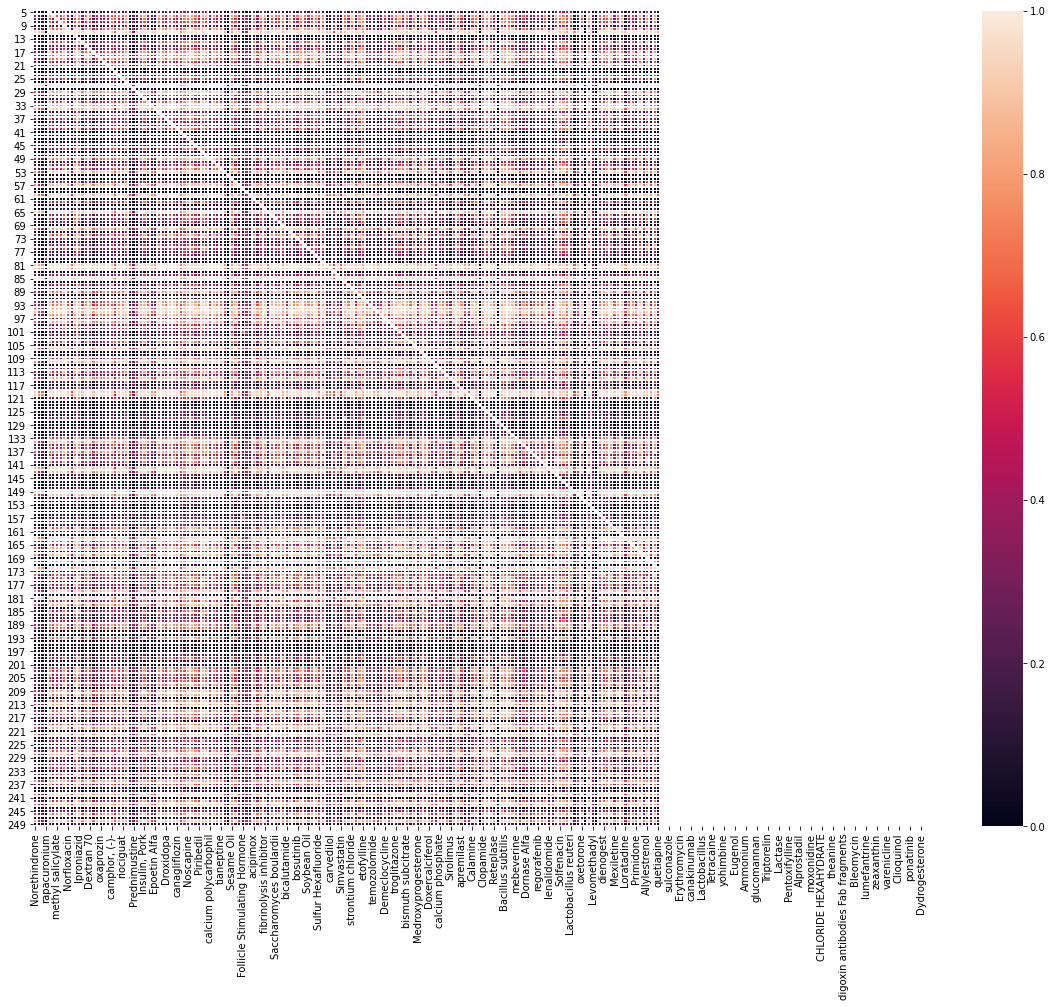

In [ ]:
# plotting the heatmap
plt.subplots(figsize=(20,15))
sn.heatmap(data = data, linewidths=.5)
#plt.subplots(figsize=(20,15))
# displaying the plotted heatmap
plt.show()